# Assignment 6 - Computer Applications in Physics
**Yu Jiawei (586067) Humblodt-Universität zu Berlin**

Numerical Integration

In [5]:
import numpy as np
import scipy
import scipy.integrate
import matplotlib.pyplot as mpl

## Part 1: Trapezoidal Rule

With this technique of approximation, a definite integral can be numerically calculated as

$$ \int_{a}^{b} f(x)\,dx \approx h \left(\frac{f(a)}{2} + \frac{f(b)}{2} + \sum_{i=1}^{n-1} f(a+ih) \right) $$

In [94]:
# Numerical integration by Trapezoidal Rule
def int_trapez(func, a=0, b=1, n=1000):
    
    # Length of the step
    h = (b-a)/n
    
    # Evaluate the Integral
    f_val = func(a + np.arange(n+1) * h)
    T = h * (f_val[0]/2 + f_val[-1]/2 + np.sum(f_val[1:-1]))
    
    return T

## Part 2: Simpson's Rule
With this technique of approximation, a definite integral can be numerically calculated as

$$ \int_{a}^{b} f(x)\,dx \approx \frac{h}{3} \sum_{j=1}^{n/2} \left[ f(x_{2j-2}) + 4f(x_{2j-1}) + f(x_{2j}) \right] $$

with $x_k = a+k\cdot h$ for $k = 0,1,\cdots,n$

Note that at least 2 intervals are required.

In [176]:
def int_simpson(func, a=0, b=1, n=1000):
    
    # Check if the number of intervals is even
    # if n % 2:
        # raise ValueError("n must be even!")
    
    # Length of the step
    h = (b-a)/n
    
    # Evaluate the Integral
    f_val = func(a + np.arange(n+1) * h)
    T = h/3 * np.sum(f_val[0:-2:2] + 4*f_val[1::2] + f_val[2::2])
    return T

## Part 3: Boole's Rule
With this technique of approximation, a definite integral can be numerically calculated as

$$ \int_{a}^{b} f(x)\,dx \approx \frac{2h}{45} \sum_{j=1}^{n/4} \left[ 7f(x_{4j-4}) + 32f(x_{4j-3}) 
+ 12f(x_{4j-2}) + 32f(x_{4j-1}) + 7f(x_{4j}) \right] $$

with $x_k = a+k\cdot h$ for $k = 0,1,\cdots,n$

Note that at least 4 intervals are required.

In [179]:
def int_boole(func, a=0, b=1, n=1000):
    
    # Check if the number of intervals is divisible by 4
    # if n % 4:
        # raise ValueError("n must be a multiple of 4!")
    
    # Length of the step
    h = (b-a)/n
    
    # Evaluate the Integral
    f_val = func(a + np.arange(n+1) * h)
    T = 2*h/45 * np.sum(7*f_val[0:-2:4] + 32*f_val[1::4] + 12*f_val[2::4] + 32*f_val[3::4] + 7*f_val[4::4])
    
    return T

Now we evaluate the following definite integrals respectively with the three methods above

$$ I_1 = \int_{0}^{1} e^{-x^2} \, dx $$

$$ I_2 = \int_{0}^{4} x^6-3x^5+10x^4-20x^3 \, dx $$

$$ I_3 = \int_{0}^{10} \frac{1}{x^2-3x+5} \, dx $$

In [124]:
def f1(x):
    f = np.exp(-x**2)
    return f

In [125]:
def f2(x):
    f = x**6 - 3*x**5 + 10*x**4 - 20*x**3
    return f

In [126]:
def f3(x):
    f = 1/(x**2 - 3*x +5)
    return f

# The Results

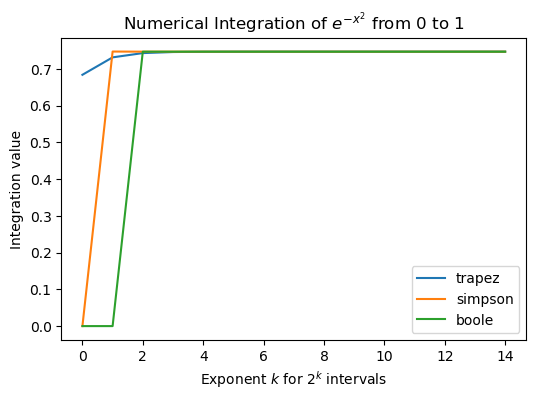

In [204]:
# Convergence tolerance of a cauchy sequence
# epsilon = 1e-10

# Prepare the output array
N = 15
Res1_trapez = np.zeros(N)
Res1_simpson = np.zeros_like(Res1_trapez)
Res1_boole = np.zeros_like(Res1_trapez)

for i in np.arange(N):
    n = 2**i
    Res1_trapez[i] = int_trapez(f1, 0, 1, n)
    Res1_simpson[i] = int_simpson(f1, 0, 1, n)
    Res1_boole[i] = int_boole(f1, 0, 1, n)

Graph1 = mpl.figure(dpi=100)
mpl.plot(np.arange(N), Res1_trapez, label="trapez")
mpl.plot(np.arange(N),Res1_simpson, label="simpson")
mpl.plot(np.arange(N),Res1_boole, label="boole")
mpl.xlabel("Exponent $k$ for $2^k$ intervals")
mpl.ylabel("Integration value")
mpl.title("Numerical Integration of $e^{-x^2}$ from 0 to 1")
mpl.legend(loc="best")
mpl.show()

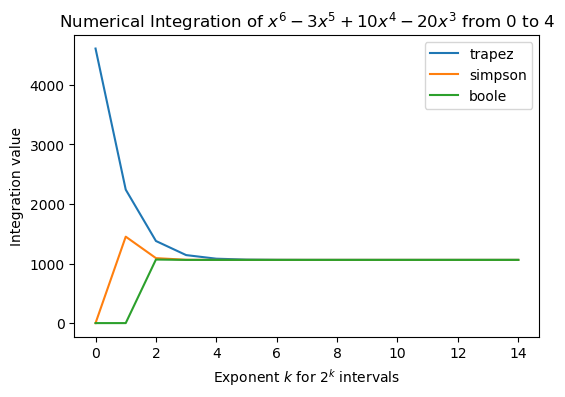

In [203]:
# Prepare the output array
N = 15
Res2_trapez = np.zeros(N)
Res2_simpson = np.zeros_like(Res2_trapez)
Res2_boole = np.zeros_like(Res2_trapez)

for i in np.arange(N):
    n = 2**i
    Res2_trapez[i] = int_trapez(f2, 0, 4, n)
    Res2_simpson[i] = int_simpson(f2, 0, 4, n)
    Res2_boole[i] = int_boole(f2, 0, 4, n)

Graph2 = mpl.figure(dpi=100)
mpl.plot(np.arange(N), Res2_trapez, label="trapez")
mpl.plot(np.arange(N),Res2_simpson, label="simpson")
mpl.plot(np.arange(N),Res2_boole, label="boole")
mpl.xlabel("Exponent $k$ for $2^k$ intervals")
mpl.ylabel("Integration value")
mpl.title("Numerical Integration of $x^6-3x^5+10x^4-20x^3$ from 0 to 4")
mpl.legend(loc="best")
mpl.show()

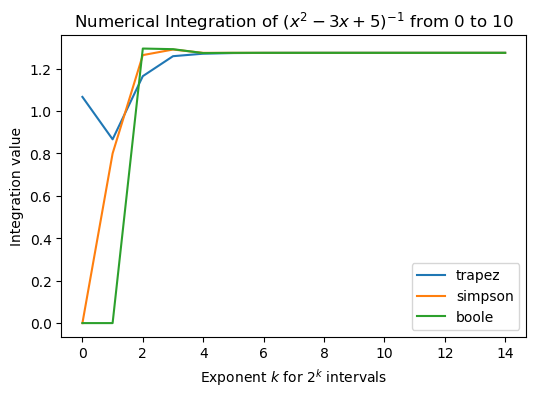

In [212]:
# Prepare the output array
N = 15
Res3_trapez = np.zeros(N)
Res3_simpson = np.zeros_like(Res3_trapez)
Res3_boole = np.zeros_like(Res3_trapez)

for i in np.arange(N):
    n = 2**i
    Res3_trapez[i] = int_trapez(f3, 0, 10, n)
    Res3_simpson[i] = int_simpson(f3, 0, 10, n)
    Res3_boole[i] = int_boole(f3, 0, 10, n)

Graph3 = mpl.figure(dpi=100)
mpl.plot(np.arange(N), Res3_trapez, label="trapez")
mpl.plot(np.arange(N),Res3_simpson, label="simpson")
mpl.plot(np.arange(N),Res3_boole, label="boole")
mpl.xlabel("Exponent $k$ for $2^k$ intervals")
mpl.ylabel("Integration value")
mpl.title("Numerical Integration of $(x^2-3x+5)^{-1}$ from 0 to 10")
mpl.legend(loc="best")
mpl.show()